### Visualizing Data in Python
#### Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

Today, we will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [5]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [6]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

After we have a general 'feel' for the data, it is often good to get a feel for the shape of the distribution of the data.

Text(0.5, 1.0, 'Histogram for total bill')

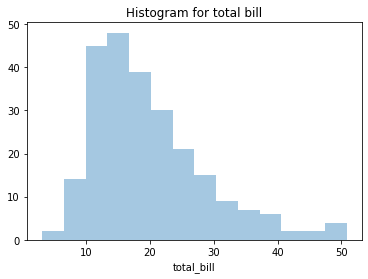

In [11]:
# Plot a histogram of the total bill
sns.distplot(tips_data["total_bill"], kde=False).set_title("Histogram for total bill")

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for tips')

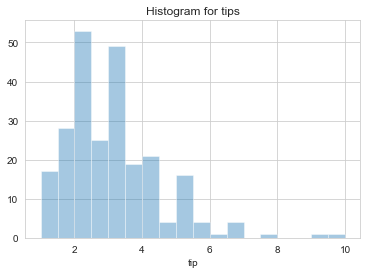

In [16]:
# Plot a histogram of the tips only
sns.set_style("whitegrid") 
sns.distplot(tips_data["tip"], kde=False).set_title("Histogram for tips")

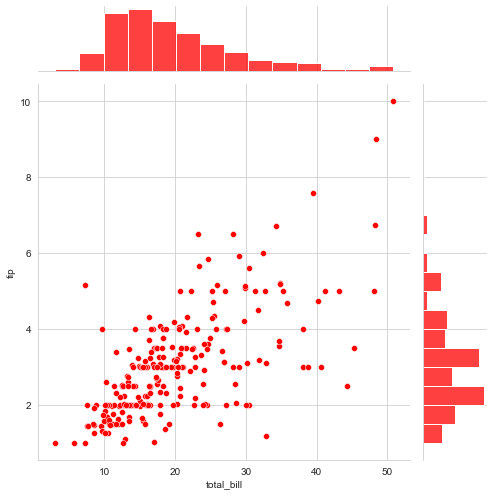

In [28]:
# Plot a histogram of both the total bill and the tips'
sns.set_style("whitegrid") 
sns.jointplot(x='total_bill', y='tip', data=tips_data, kind='scatter', color='red', height=7)

#### Creating a Boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot for total bill')

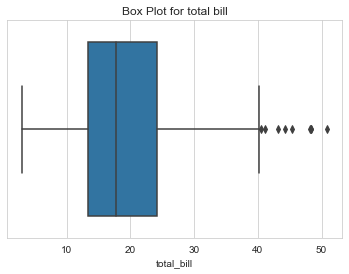

In [30]:
sns.boxplot(tips_data['total_bill']).set_title("Box Plot for total bill")

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

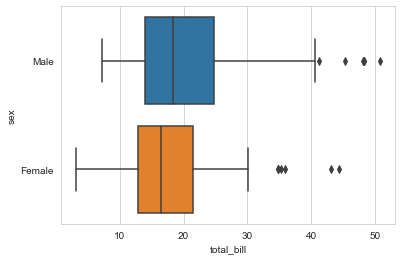

In [32]:
sns.boxplot(x='total_bill', y='sex', data=tips_data)

#### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

<AxesSubplot:xlabel='tip', ylabel='smoker'>

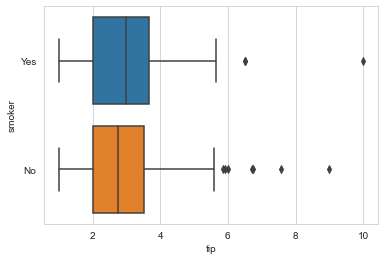

In [33]:
sns.boxplot(x='tip', y='smoker', data=tips_data)

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


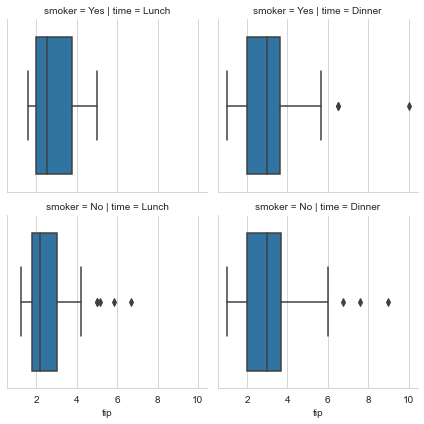

In [37]:
# Create a boxplot and histogram of the tips grouped by time of day

# sns.boxplot(x='tip', y='time', data=tips_data)

g = sns.FacetGrid(tips_data, col='time', row='smoker')
g.map(sns.boxplot, "tip")

<AxesSubplot:xlabel='tip', ylabel='day'>

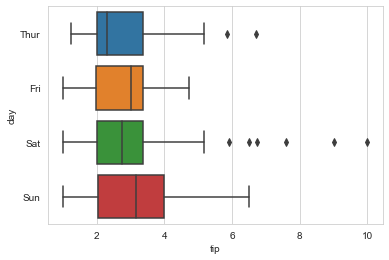

In [38]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = "tip", y = "day", data=tips_data)

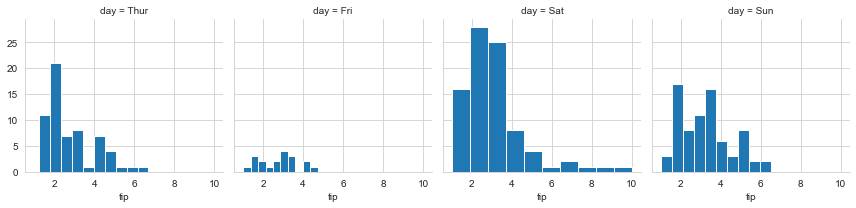

In [43]:
g = sns.FacetGrid(tips_data, col='day')
g.map(plt.hist, 'tip')